In [1]:
# 导入必要的包
import torch
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# 定义是否使用GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# 定义网络
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 6, 5, padding = 2),
            # 单通道，尺寸5*5，共6个，边缘补充2个，输出6个28 * 28的特征图
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, 5),
            # 6通道，16个5*5卷积核，输出16 * 10* 10的矩阵
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU()
        )
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size()[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x 

In [3]:
batch_size = 64
transform = transforms.ToTensor()

trainset = tv.datasets.MNIST(root = './data/', train = True, download = False, transform = transform)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size = batch_size,
    shuffle = True
)
testset = tv.datasets.MNIST(root = './data/', train = False, download = False, transform = transform)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size = batch_size,
    shuffle = True
)

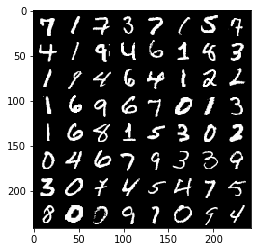

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(tv.utils.make_grid(images))

In [4]:
lr = 0.001
epochs = 8
net = LeNet5().to(device)
loss = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), lr = lr, betas = (0.9, 0.99))
train_loss = []
for epoch in range(epochs):
    sum_loss = 0.
    for i, (img, label) in enumerate(trainloader):
        img, label = img.to(device), label.to(device)
        
        opt.zero_grad()
        out = net(img)
        L = loss(out, label)
        L.backward()
        opt.step()
        
        sum_loss += L.item()
        
        if i % 100 == 99:
            print('[%d, %d] loss: %.03f'
                      % (epoch + 1, i + 1, sum_loss / 100))
            train_loss.append(sum_loss / 100)
            sum_loss = 0.0
            
    with torch.no_grad():
        correct = 0
        total = 0
        for img, label in testloader:
            img, label = img.to(device), label.to(device)
            out = net(img)
            
            _, ypred = torch.max(out.data, 1)
            total += label.size(0)
            correct += (ypred == label).sum()
        print('第%d个epoch的识别准确率为：%d%%' % (epoch + 1, (100 * correct / total)))

[1, 100] loss: 1.239
[1, 200] loss: 0.363
[1, 300] loss: 0.234
[1, 400] loss: 0.166
[1, 500] loss: 0.135
[1, 600] loss: 0.139
[1, 700] loss: 0.138
[1, 800] loss: 0.109
[1, 900] loss: 0.101
第1个epoch的识别准确率为：96%
[2, 100] loss: 0.095
[2, 200] loss: 0.077
[2, 300] loss: 0.083
[2, 400] loss: 0.083
[2, 500] loss: 0.079
[2, 600] loss: 0.065
[2, 700] loss: 0.063
[2, 800] loss: 0.064
[2, 900] loss: 0.080
第2个epoch的识别准确率为：98%
[3, 100] loss: 0.046
[3, 200] loss: 0.058
[3, 300] loss: 0.056
[3, 400] loss: 0.062
[3, 500] loss: 0.051
[3, 600] loss: 0.046
[3, 700] loss: 0.047
[3, 800] loss: 0.052
[3, 900] loss: 0.040
第3个epoch的识别准确率为：98%
[4, 100] loss: 0.037
[4, 200] loss: 0.035
[4, 300] loss: 0.038
[4, 400] loss: 0.042
[4, 500] loss: 0.037
[4, 600] loss: 0.049
[4, 700] loss: 0.039
[4, 800] loss: 0.038
[4, 900] loss: 0.037
第4个epoch的识别准确率为：98%
[5, 100] loss: 0.033
[5, 200] loss: 0.026
[5, 300] loss: 0.027
[5, 400] loss: 0.035
[5, 500] loss: 0.032
[5, 600] loss: 0.025
[5, 700] loss: 0.031
[5, 800] loss: 0.

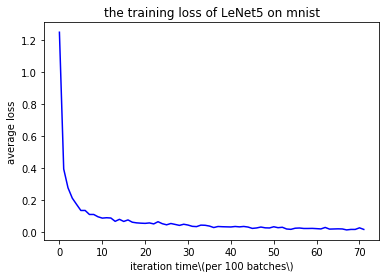

In [55]:
import matplotlib.pyplot as plt
plt.plot(train_loss, c = "blue")
plt.title("the training loss of LeNet5 on mnist")
plt.xlabel("iteration time\(per 100 batches\)")
plt.ylabel("average loss")
plt.show()

In [5]:
torch.save(net, "./LeNet5.pkl")

D:\Ananconda\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LeNet5. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
D:\Ananconda\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
D:\Ananconda\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
D:\Ananconda\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
D:\Ananconda\lib\site-packages\torch\serialization.py:292: Use